In [24]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [25]:
URL1 = 'https://www.topuniversities.com/university-rankings/world-university-rankings/2018'
URL2 = 'http://timeshighereducation.com/world-university-rankings/2018/world-ranking'

In [26]:
# Do the request
r = requests.get(URL1)

Inspecting the DOM of the website, we find that the ranking datas are stored in a text file at https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt as we can see here :

In [27]:
# 357051.txt
r.text[28109:28208]

'com/sites/default/files/js/js_1pWsQ-n2lDycaeRd49dG1c6wDcbozTaV2QKWuXAc0fQ.js"></script>\n<script typ'

In [51]:
# 357051_indicators.txt
id1 = r.text.find("357051.txt")
r.text[id1-88:id1+11]

'"rank_url":"https:\\/\\/www.topuniversities.com\\/sites\\/default\\/files\\/qs-rankings-data\\/357051.txt"'

In [59]:
id2 = r.text.find("357051_indicators.txt")
r.text[id2-99:id2+22]

'"rank_indicators_url":"https:\\/\\/www.topuniversities.com\\/sites\\/default\\/files\\/qs-rankings-data\\/357051_indicators.txt"'

We thus request from this URL to get the datas

In [7]:
data_QS_URL = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt'

In [8]:
data_QS = requests.get(data_QS_URL)

In [9]:
data_QS = data_QS.json()['data']

In [10]:
type(data_QS)

list

In [11]:
df_QS = pd.DataFrame(data_QS)

In [12]:
df_QS

,cc,core_id,country,guide,logo,nid,rank_display,region,score,stars,title,url
0,US,410,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294850,1,North America,100,6,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,US,573,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",297282,2,North America,98.7,5,Stanford University,/universities/stanford-university
2,US,253,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294270,3,North America,98.4,5,Harvard University,/universities/harvard-university
3,US,94,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294562,4,North America,97.7,5,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,GB,95,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294561,5,Europe,95.6,5,University of Cambridge,/universities/university-cambridge
5,GB,478,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294654,6,Europe,95.3,5,University of Oxford,/universities/university-oxford
6,GB,365,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294014,7,Europe,94.6,None,UCL (University College London),/universities/ucl-university-college-london
7,GB,356,United Kingdom,"<a href=""/where-to-study/europe/united-kingdom...","<img src=""https://www.topuniversities.com/site...",294030,8,Europe,93.7,None,Imperial College London,/universities/imperial-college-london
8,US,120,United States,"<a href=""/where-to-study/north-america/united-...","<img src=""https://www.topuniversities.com/site...",294536,9,North America,93.5,5,University of Chicago,/universities/university-chicago
9,CH,201,Switzerland,"<a href=""/where-to-study/europe/switzerland/gu...","<img src=""https://www.topuniversities.com/site...",294432,10,Europe,93.3,None,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...


In [13]:
df_ranking = pd.DataFrame({"University" : df_QS.title, "Rank" : df_QS.rank_display, "Score" : df_QS.score, "Country": df_QS.country, "Region": df_QS.region, "URL" : df_QS.url},columns = ['Rank', 'University', 'Score', 'Country', 'Region', 'URL'])

In [14]:
df_ranking

,Rank,University,Score,Country,Region,URL
0,1,Massachusetts Institute of Technology (MIT),100,United States,North America,/universities/massachusetts-institute-technolo...
1,2,Stanford University,98.7,United States,North America,/universities/stanford-university
2,3,Harvard University,98.4,United States,North America,/universities/harvard-university
3,4,California Institute of Technology (Caltech),97.7,United States,North America,/universities/california-institute-technology-...
4,5,University of Cambridge,95.6,United Kingdom,Europe,/universities/university-cambridge
5,6,University of Oxford,95.3,United Kingdom,Europe,/universities/university-oxford
6,7,UCL (University College London),94.6,United Kingdom,Europe,/universities/ucl-university-college-london
7,8,Imperial College London,93.7,United Kingdom,Europe,/universities/imperial-college-london
8,9,University of Chicago,93.5,United States,North America,/universities/university-chicago
9,10,ETH Zurich - Swiss Federal Institute of Techno...,93.3,Switzerland,Europe,/universities/eth-zurich-swiss-federal-institu...


In [15]:
#find index of 200th 
df_ranking[df_ranking['Rank'] == "200"].index.tolist()

[198]

In [16]:
# keep the top 200 universities
df_ranking = df_ranking[:199].copy()

In [17]:
df_ranking

,Rank,University,Score,Country,Region,URL
0,1,Massachusetts Institute of Technology (MIT),100,United States,North America,/universities/massachusetts-institute-technolo...
1,2,Stanford University,98.7,United States,North America,/universities/stanford-university
2,3,Harvard University,98.4,United States,North America,/universities/harvard-university
3,4,California Institute of Technology (Caltech),97.7,United States,North America,/universities/california-institute-technology-...
4,5,University of Cambridge,95.6,United Kingdom,Europe,/universities/university-cambridge
5,6,University of Oxford,95.3,United Kingdom,Europe,/universities/university-oxford
6,7,UCL (University College London),94.6,United Kingdom,Europe,/universities/ucl-university-college-london
7,8,Imperial College London,93.7,United Kingdom,Europe,/universities/imperial-college-london
8,9,University of Chicago,93.5,United States,North America,/universities/university-chicago
9,10,ETH Zurich - Swiss Federal Institute of Techno...,93.3,Switzerland,Europe,/universities/eth-zurich-swiss-federal-institu...


In [18]:
import numpy as np

# fetch the university info from its webpage
def get_number_of(kind, url):
    # get the data from the university page
    r = requests.get('https://www.topuniversities.com'+url)
    soup = BeautifulSoup(r.text, "html.parser")
    # find the corresponding tag
    try:
        res_string = soup.find('div', class_=kind).find('div', class_="number")
    # convert result into integer
        res = int(str(res_string.string).replace('\n', "").replace(",", ""))
    except:
        res = np.nan
    return res

In [19]:
df_ranking['Total Faculties'] = df_ranking['URL'].map(lambda x : get_number_of("total faculty", x))
df_ranking['International Faculties'] = df_ranking['URL'].map(lambda x : get_number_of("inter faculty", x))
df_ranking['Total Students'] = df_ranking['URL'].map(lambda x : get_number_of("total student", x))
df_ranking['International Students'] = df_ranking['URL'].map(lambda x : get_number_of("total inter", x))

In [64]:
df_ranking = df_ranking.drop('URL', axis=1)
df_ranking

,Rank,University,Score,Country,Region,Total Faculties,International Faculties,Total Students,International Students
0,1,Massachusetts Institute of Technology (MIT),100,United States,North America,2982.0,1679.0,11067.0,3717.0
1,2,Stanford University,98.7,United States,North America,4285.0,2042.0,15878.0,3611.0
2,3,Harvard University,98.4,United States,North America,4350.0,1311.0,22429.0,5266.0
3,4,California Institute of Technology (Caltech),97.7,United States,North America,953.0,350.0,2255.0,647.0
4,5,University of Cambridge,95.6,United Kingdom,Europe,5490.0,2278.0,18770.0,6699.0
5,6,University of Oxford,95.3,United Kingdom,Europe,6750.0,2964.0,19720.0,7353.0
6,7,UCL (University College London),94.6,United Kingdom,Europe,6345.0,2554.0,31080.0,14854.0
7,8,Imperial College London,93.7,United Kingdom,Europe,3930.0,2071.0,16090.0,8746.0
8,9,University of Chicago,93.5,United States,North America,2449.0,635.0,13557.0,3379.0
9,10,ETH Zurich - Swiss Federal Institute of Techno...,93.3,Switzerland,Europe,2477.0,1886.0,19815.0,7563.0


### a) Which are the best universities in term of ratio between faculty members and students ?

In [82]:
df_ranking['% Faculties/Students'] = df_ranking['Total Faculties']/df_ranking['Total Students']

In [84]:
df_ranking.sort_values('% Faculties/Students', ascending=False)

,Rank,University,Score,Country,Region,Total Faculties,International Faculties,Total Students,International Students,% Faculties/Students
3,4,California Institute of Technology (Caltech),97.7,United States,North America,953.0,350.0,2255.0,647.0,0.422616
15,16,Yale University,90.4,United States,North America,4940.0,1708.0,12402.0,2469.0,0.398323
5,6,University of Oxford,95.3,United Kingdom,Europe,6750.0,2964.0,19720.0,7353.0,0.342292
4,5,University of Cambridge,95.6,United Kingdom,Europe,5490.0,2278.0,18770.0,6699.0,0.292488
16,17,Johns Hopkins University,89.8,United States,North America,4462.0,1061.0,16146.0,4105.0,0.276353
1,2,Stanford University,98.7,United States,North America,4285.0,2042.0,15878.0,3611.0,0.269870
0,1,Massachusetts Institute of Technology (MIT),100,United States,North America,2982.0,1679.0,11067.0,3717.0,0.269450
185,186,University of Rochester,49.3,United States,North America,2569.0,488.0,9636.0,2805.0,0.266604
18,19,University of Pennsylvania,88.7,United States,North America,5499.0,1383.0,20639.0,4250.0,0.266437
17,18,Columbia University,88.9,United States,North America,6189.0,913.0,25045.0,8105.0,0.247115


### b) Which are the best universities in term of ratio of international students?

In [86]:
df_ranking['% International Students'] = df_ranking['International Students']/df_ranking['Total Students']

In [87]:
df_ranking.sort_values('% International Students', ascending=False)

,Rank,University,Score,Country,Region,Total Faculties,International Faculties,Total Students,International Students,% Faculties/Students,% International Students
34,35,London School of Economics and Political Scien...,81.8,United Kingdom,Europe,1088.0,687.0,9760.0,6748.0,0.111475,0.691393
11,12,Ecole Polytechnique Fédérale de Lausanne (EPFL),91.2,Switzerland,Europe,1695.0,1300.0,10343.0,5896.0,0.163879,0.570047
7,8,Imperial College London,93.7,United Kingdom,Europe,3930.0,2071.0,16090.0,8746.0,0.244251,0.543567
198,200,Maastricht University,47.9,Netherlands,Europe,1277.0,502.0,16385.0,8234.0,0.077937,0.502533
47,=47,Carnegie Mellon University,78.6,United States,North America,1342.0,425.0,13356.0,6385.0,0.100479,0.478062
6,7,UCL (University College London),94.6,United Kingdom,Europe,6345.0,2554.0,31080.0,14854.0,0.204151,0.477928
91,92,University of St Andrews,65.3,United Kingdom,Europe,1140.0,485.0,8800.0,4030.0,0.129545,0.457955
41,=41,The University of Melbourne,80.4,Australia,Oceania,3311.0,1477.0,42182.0,18030.0,0.078493,0.427434
126,127,Queen Mary University of London,58.3,United Kingdom,Europe,1885.0,801.0,16135.0,6806.0,0.116827,0.421816
25,26,The University of Hong Kong,85.5,Hong Kong,Asia,3012.0,2085.0,20214.0,8230.0,0.149006,0.407144


### c) Aggregating the data by country

In [210]:
import seaborn as sns
%matplotlib inline

    
def bars(t, data, xlab, ylab):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize = (15,8))
    ax.set_title(t, fontsize=15, fontweight='bold')
    sns.barplot(x=xlab, y=ylab, data=data, saturation=0.7, errcolor='.7')
    plt.xticks(rotation=90)
    plt.show()

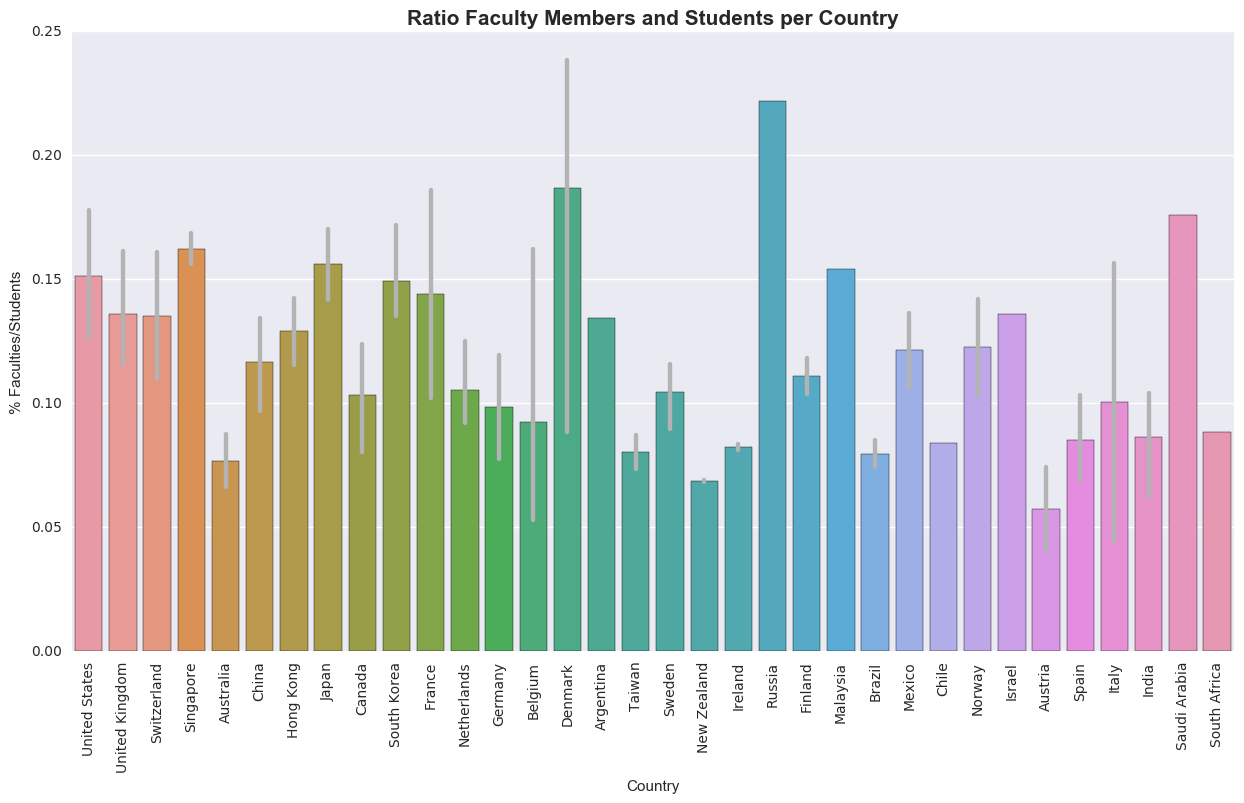

In [212]:
bars("Ratio Faculty Members and Students per Country", df_ranking, 'Country', '% Faculties/Students')

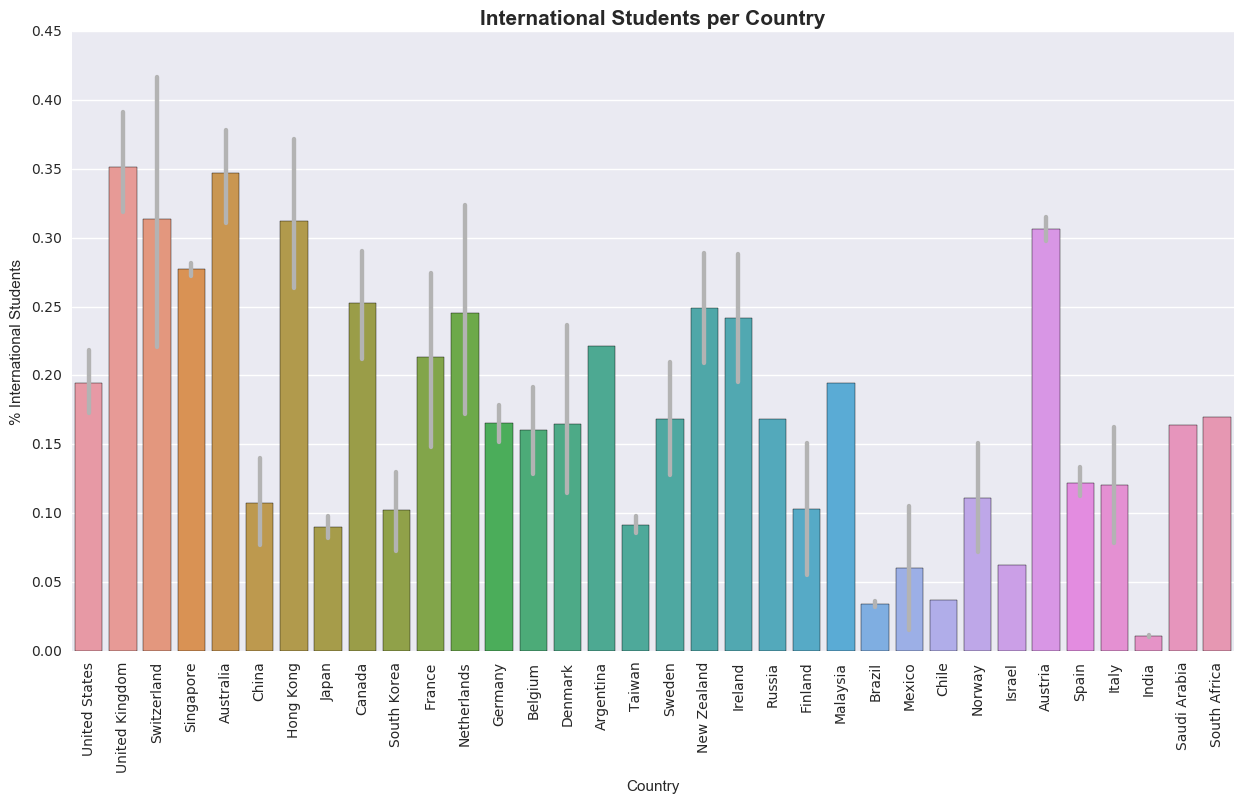

In [213]:
bars("International Students per Country", df_ranking, 'Country', '% International Students')

### d) Aggregating the data by region

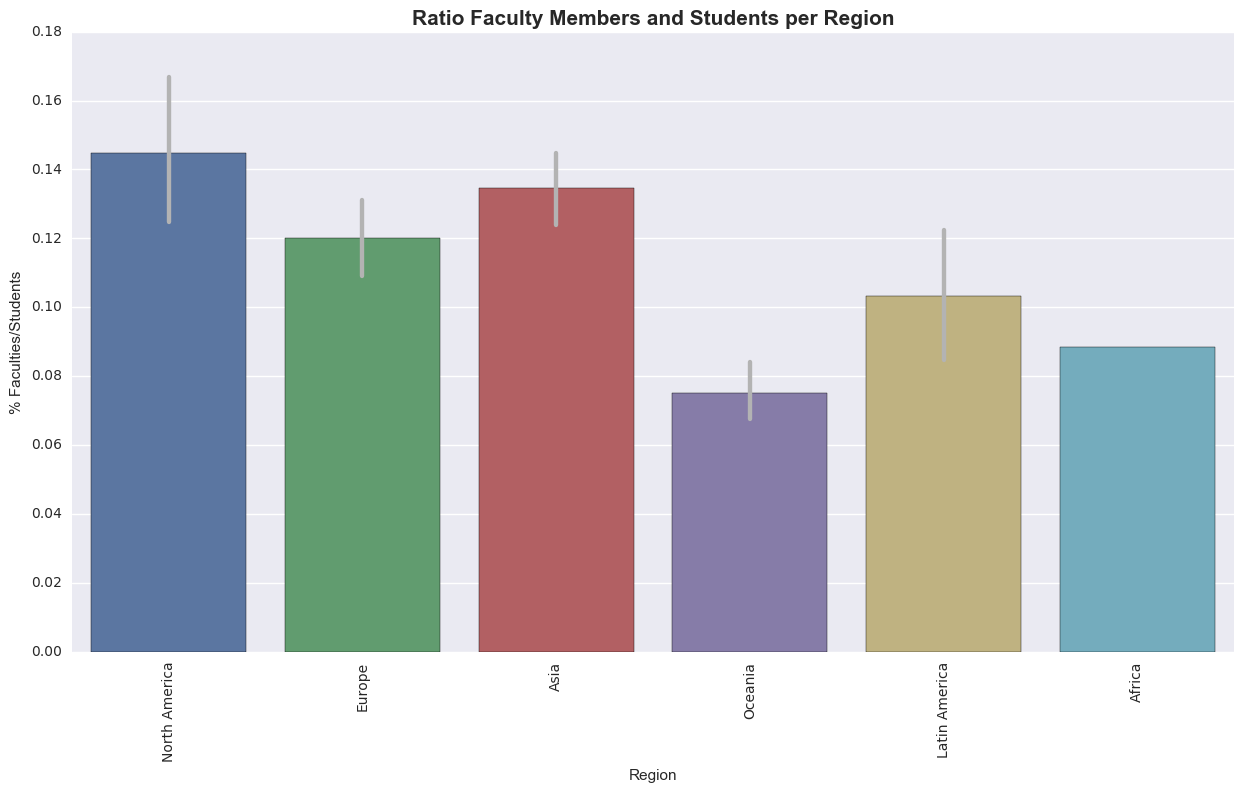

In [214]:
bars("Ratio Faculty Members and Students per Region", df_ranking, 'Region', '% Faculties/Students')

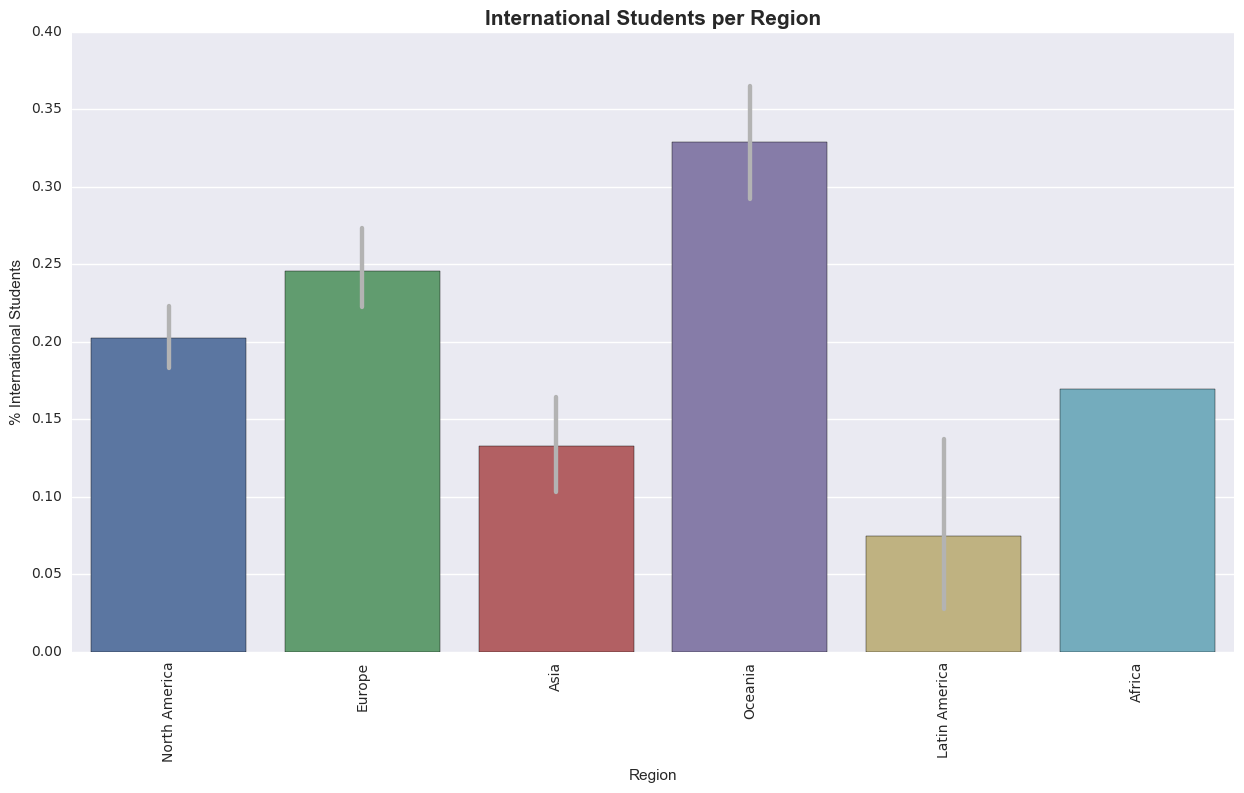

In [215]:
bars("International Students per Region", df_ranking, 'Region', '% International Students')